# Building Agents That Use Code

This notebook is part of the [Hugging Face Agents Course](https://www.hf.co/learn/agents-course), a free Course from beginner to expert, where you learn to build Agents.

## Let's install the dependencies and login to our HF account to access the Inference API

If you haven't installed `smolagents` yet, you can do so by running the following command:

In [ ]:
!pip install smolagents

Let's also login to the Hugging Face Hub to have access to the Inference API.

In [1]:
from huggingface_hub import notebook_login
from huggingface_hub import interpreter_login

# notebook_login()
interpreter_login()


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|



## The `@tool` Decorator  

### Generating a tool that retrieves the highest-rated catering

Let's imagine that Alfred has already decided on the menu for the party, but now he needs help preparing food for such a large number of guests. To do so, he would like to hire a catering service and needs to identify the highest-rated options available. Alfred can leverage a tool to search for the best catering services in his area.

Below is an example of how Alfred can use the `@tool` decorator to make this happen:

In [ ]:
from smolagents import CodeAgent, HfApiModel, tool

# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }

    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)

    return best_service


agent = CodeAgent(tools=[catering_service_tool], model=HfApiModel())

# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)

## Defining a Tool as a Python Class  

### Generating a tool to generate ideas about the superhero-themed party

Alfred's party at the mansion is a **superhero-themed event**, but he needs some creative ideas to make it truly special. As a fantastic host, he wants to surprise the guests with a unique theme.

To do this, he can use an agent that generates superhero-themed party ideas based on a given category. This way, Alfred can find the perfect party theme to wow his guests.

In [ ]:
from smolagents import Tool, CodeAgent, HfApiModel

class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""

    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }

        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.")

# Instantiate the tool
party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(tools=[party_theme_tool], model=HfApiModel())

# Run the agent to generate a party theme idea
result = agent.run(
    "What would be a good superhero party idea for a 'villain masquerade' theme?"
)

print(result)

## Sharing a Tool to the Hub

Sharing your custom tool with the community is easy! Simply upload it to your Hugging Face account using the `push_to_hub()` method.

For instance, Alfred can share his `catering_service_tool` to help others find the best catering services in Gotham. Here's how to do it:

In [ ]:
party_theme_tool.push_to_hub("{your_username}/catering_service_tool", token="<YOUR_HUGGINGFACEHUB_API_TOKEN>")

## Importing a Tool from the Hub

You can easily import tools created by other users using the `load_tool()` function. For example, Alfred might want to generate a promotional image for the party using AI. Instead of building a tool from scratch, he can leverage a predefined one from the community:

In [ ]:
from smolagents import load_tool, CodeAgent, HfApiModel

image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=HfApiModel()
)

agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")

## Importing a Hugging Face Space as a Tool

You can also import a HF Space as a tool using `Tool.from_space()`. This opens up possibilities for integrating with thousands of spaces from the community for tasks from image generation to data analysis.

The tool will connect with the spaces Gradio backend using the `gradio_client`, so make sure to install it via `pip` if you don't have it already. For the party, Alfred can also use a HF Space directly for the generation of the previous annoucement AI-generated image. Let's build it!

In [2]:
!pip install gradio_client

Looking in indexes: https://artifactory.ep.chehejia.com/artifactory/api/pypi/pypi-remote/simple, https://pypi.ngc.nvidia.com


In [3]:
from smolagents import CodeAgent, HfApiModel, Tool

image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

model = HfApiModel("Qwen/Qwen2.5-Coder-32B-Instruct")

agent = CodeAgent(tools=[image_generation_tool], model=model)

agent.run(
    task="Improve this prompt, then generate an image of it.",
    additional_args={'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}
)

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


Since `api_name` was not defined, it was automatically set to the first available API: `/infer`.


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Improve this prompt, then generate an image of it.                                                              │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}.      │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Improving the prompt                                                                                           
  improved_prompt = "A grand superhero-themed party at Wayne Manor, with elegant decorations featuring iconic      
  comic book characters. Alfred, dressed in his butler's regalia, oversees a luxurious gala with an array of       
  guests in colorful superhero costumes. The scene captures the blend of sophistication and excitement with        
  high-tech lighting and gourmet food stations."                                                                   
  print(improved_prompt)                                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
A grand superhero-themed party at Wayne Manor, with elegant decorations featuring iconic comic book characters. 
Alfred, dressed in his butler's regalia, oversees a luxurious gala with an array of guests in colorful superhero 
costumes. The scene captures the blend of sophistication and excitement with high-tech lighting and gourmet food 
stations.

Out: None

[Step 1: Duration 8.85 seconds| Input tokens: 2,104 | Output tokens: 118]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Generating the image                                                                                           
  image = image_generator(prompt=improved_prompt)                                                                  
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: /tmp/gradio/1d118211f64c65aca4c7f66dbcd14b10acd3f82c58f4aee5bbf396c5a183b22a/image.webp

[Step 2: Duration 18.38 seconds| Input tokens: 4,530 | Output tokens: 175]

'/tmp/gradio/1d118211f64c65aca4c7f66dbcd14b10acd3f82c58f4aee5bbf396c5a183b22a/image.webp'

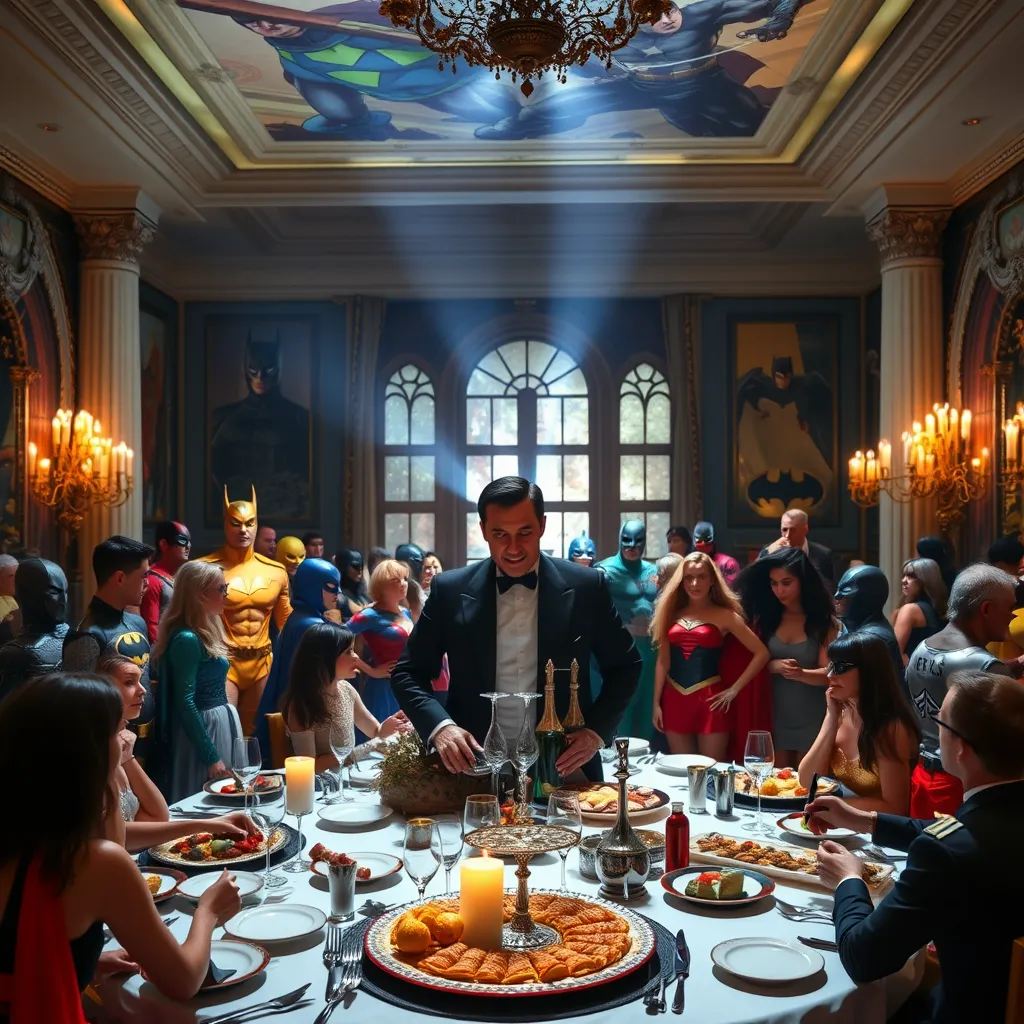

In [4]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt

image_path = '/tmp/gradio/1d118211f64c65aca4c7f66dbcd14b10acd3f82c58f4aee5bbf396c5a183b22a/image.webp'

img = PILImage.open(image_path)
img

## Importing a LangChain Tool

These tools need a [SerpApi API Key](https://serpapi.com/).

You can easily load LangChain tools using the `Tool.from_langchain()` method. Alfred, ever the perfectionist, is preparing for a spectacular superhero night at Wayne Manor while the Waynes are away. To make sure every detail exceeds expectations, he taps into LangChain tools to find top-tier entertainment ideas.

By using `Tool.from_langchain()`, Alfred effortlessly adds advanced search functionalities to his smolagent, enabling him to discover exclusive party ideas and services with just a few commands.

Here's how he does it:

In [ ]:
!pip install langchain-community google-search-results

In [ ]:
from google.colab import userdata
import os
os.environ["SERPAPI_API_KEY"] = userdata.get('SERPAPI_API_KEY')

In [ ]:
from langchain.agents import load_tools
from smolagents import CodeAgent, HfApiModel, Tool

search_tool = Tool.from_langchain(load_tools(["serpapi"])[0])

agent = CodeAgent(tools=[search_tool], model=model)

agent.run("Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences.")

With this setup, Alfred can quickly discover luxurious entertainment options, ensuring Gotham's elite guests have an unforgettable experience. This tool helps him curate the perfect superhero-themed event for Wayne Manor! 🎉